In [ ]:
# ✅ Imports
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [ ]:
# ✅ Define your model names
model_names = [
    "banglabert",
    "bangla-bert-base",
    "banglabert-finetuned-sc",
    "banglabert_large",
    "banglabert_small",
    "bangla-bert-base-finetuned-tweets",
    "banglabert-sentiment",
]


In [ ]:
# ✅ Base path to your saved results
base_path = "/content/drive/MyDrive/MultiBanFake/BanglaBert"


In [ ]:
# ✅ Read evaluation_results.json for each model
results = []
for model_name in model_names:
    result_path = os.path.join(base_path, model_name, "evaluation_results.json")
    try:
        with open(result_path, "r") as f:
            data = json.load(f)
            data["Model"] = model_name
            results.append(data)
    except Exception as e:
        print(f"❌ Error loading {model_name}: {e}")


In [ ]:
# ✅ Create DataFrame
df_results = pd.DataFrame(results)
df_results = df_results[["Model", "Accuracy", "Fake F1-score", "Non-Fake F1-score", "Weighted F1-score"]]
df_results = df_results.sort_values("Weighted F1-score", ascending=False).reset_index(drop=True)


In [ ]:
# ✅ Show table
print("📊 Model Performance Comparison Table:")
display(df_results)

📊 Model Performance Comparison Table:


,Model,Accuracy,Fake F1-score,Non-Fake F1-score,Weighted F1-score
0,banglabert_large,0.822917,0.827935,0.817597,0.822766
1,banglabert-sentiment,0.804167,0.823308,0.780374,0.801841
2,banglabert,0.776042,0.796978,0.750290,0.773634
3,banglabert-finetuned-sc,0.768750,0.792910,0.738208,0.765559
4,bangla-bert-base,0.758333,0.770751,0.744493,0.757622
5,banglabert_small,0.752083,0.787500,0.702500,0.745000
6,bangla-bert-base-finetuned-tweets,0.733333,0.726496,0.739837,0.733167


<ipython-input-20-1036929268>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x="Model", y="Weighted F1-score", palette="viridis")


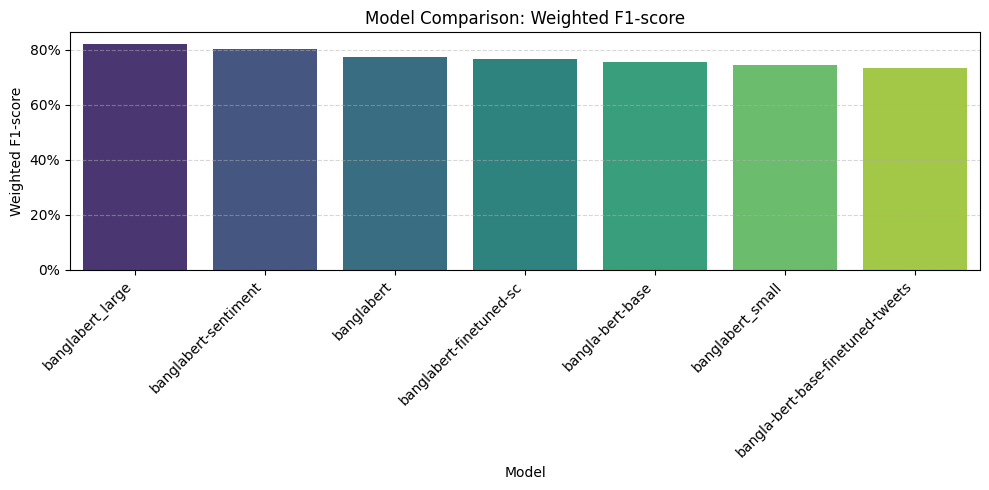

In [ ]:
# ✅ Bar plot → Weighted F1-score
plt.figure(figsize=(10, 5))
sns.barplot(data=df_results, x="Model", y="Weighted F1-score", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Model Comparison: Weighted F1-score")
plt.ylabel("Weighted F1-score")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

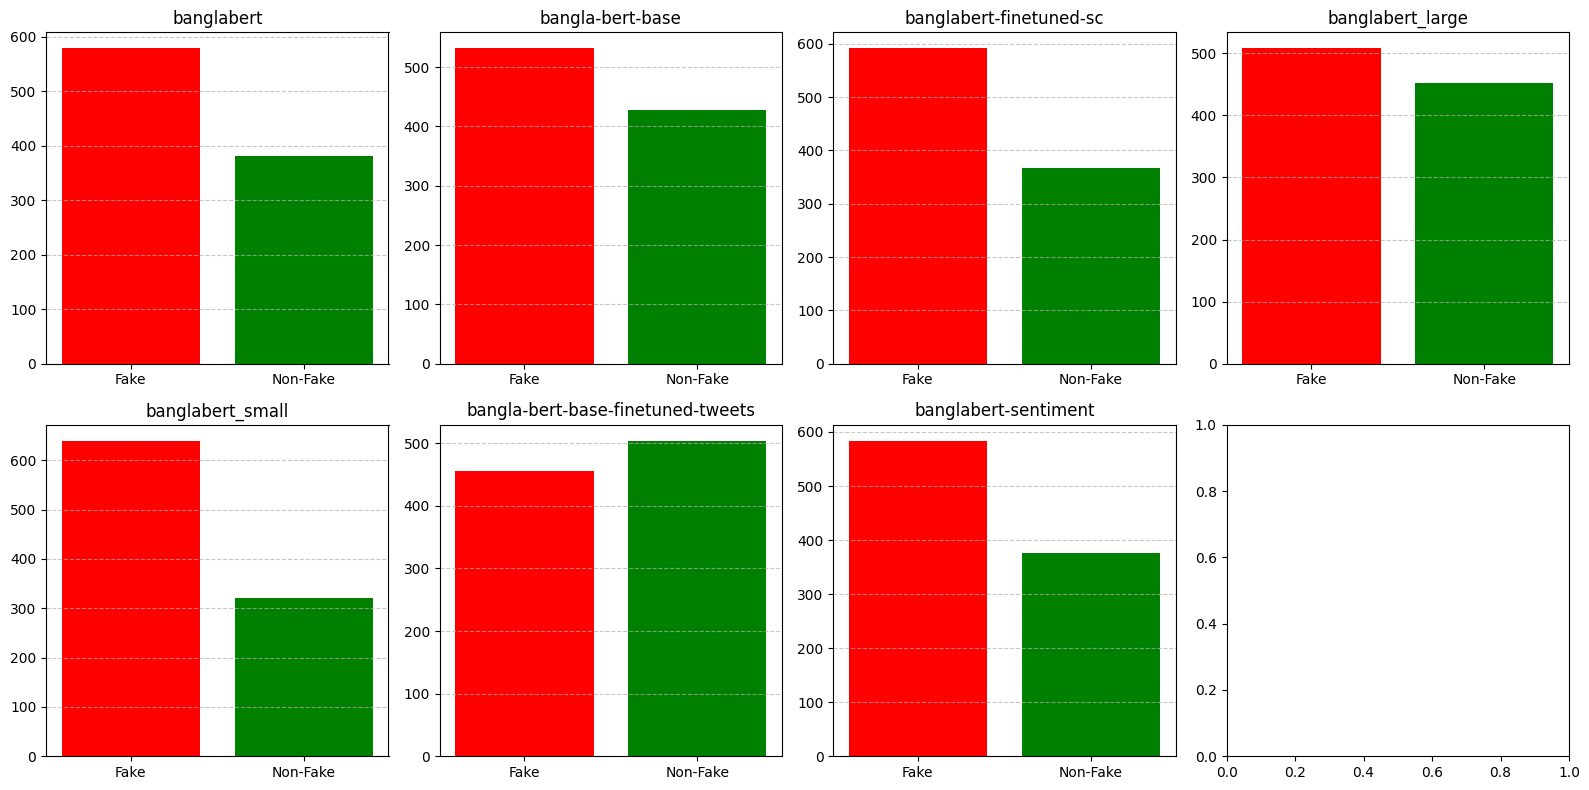

In [ ]:
# ✅ Optional: Plot Predicted Class Distribution → for diversity check
# Load test_softmax.npy for each model and plot class predictions
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, model_name in enumerate(model_names):
    try:
        softmax_path = os.path.join(base_path, model_name, "test_softmax.npy")
        probs = np.load(softmax_path)
        preds = np.argmax(probs, axis=1)
        fake_count = np.sum(preds == 0)
        nonfake_count = np.sum(preds == 1)
        axes[i].bar(["Fake", "Non-Fake"], [fake_count, nonfake_count], color=["red", "green"])
        axes[i].set_title(model_name)
        axes[i].grid(axis="y", linestyle="--", alpha=0.7)
    except Exception as e:
        axes[i].set_visible(False)
        print(f"❌ Error loading softmax for {model_name}: {e}")

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Load softmax probabilities
probs = np.load("/content/drive/MyDrive/MultiBanFake/BanglaBert/bangla-bert-base-finetuned-tweets/test_softmax.npy")

# Convert softmax to predicted labels
y_pred = np.argmax(probs, axis=1)

# Ground truth labels (assuming 480 fake, 480 non-fake)
y_true = np.array([0]*480 + [1]*480)

# Generate and print classification report
print(classification_report(y_true, y_pred, target_names=["Fake", "Non-Fake"]))


              precision    recall  f1-score   support

        Fake       0.75      0.71      0.73       480
    Non-Fake       0.72      0.76      0.74       480

    accuracy                           0.73       960
   macro avg       0.73      0.73      0.73       960
weighted avg       0.73      0.73      0.73       960

